<a href="https://colab.research.google.com/github/Diogod00/Lab2/blob/Diogo_Quadrado/Lab2_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory Session 2 -- Assignment

To be delivered until 2021-12-20 23:59:59.

## Section 1 -- Linear Regression

**1.** Consider a dataset with 100 observations, containing a single predictor and a quantitative response. Two different models are fitted to the data, a linear regression ($m_1: Y = \beta_0 + \beta_1 X + \epsilon$) and a cubic regression ($m_2: Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$).

**1.a)** Suppose that the actual relation between X and Y is linear. Can the **training** residual sum of squares (RSS) of the linear model be expected to be smaller, larger or equal to the one from the cubic model? Or is there no information to tell? Justify your answer.

**1.b)** Answer question 1.a) considering the test RSS rather than the training RSS.

**1.c)** Suppose that the actual relationship between X and Y is not linear, but it is not known how far it is from being linear. What is it expected of the the **training** RSS for the linear compared with the cubic models? Or is there not enough information? Justify your answer.

**1.d)** Answer question 1.c) considering the test RSS rather than the training RSS.

**2.a)** Load the dataset "auto.csv" 

In [7]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

auto = pd.read_csv("auto.csv")
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


**2.b)** Perform a simple linear regression considering *mpg* as the response and *horsepower* as the predictor. Given the results, comment on the following statements:

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = auto['horsepower'].values.reshape(-1, 1)  
Y = auto['mpg'].values.reshape(-1, 1)  

regr = LinearRegression()
regr.fit(X,Y)
print('mpg = {:.4f} + {:.4f} * horsepower'.format(regr.intercept_[0], regr.coef_[0][0]))

mpg_pred = regr.predict(X)
r2_value = r2_score(y, mpg_pred)
print('R^2: {:.4f}'.format(r2_value))

mpg = 39.9359 + -0.1578 * horsepower
R^2: 0.6059


    i) Are the predictor and response statistically related?

    ii) How strong is the relationship between predictor and response? (*Hint: comment on the R^2 score of the model*)

    iii) Is the relationship between the predictor and response positive or negative?

    iv) What is the predicted value of mpg when the horsepower is 98?

**2.c)** Plot a scatter plot of the response and predictor, along with the regression line.

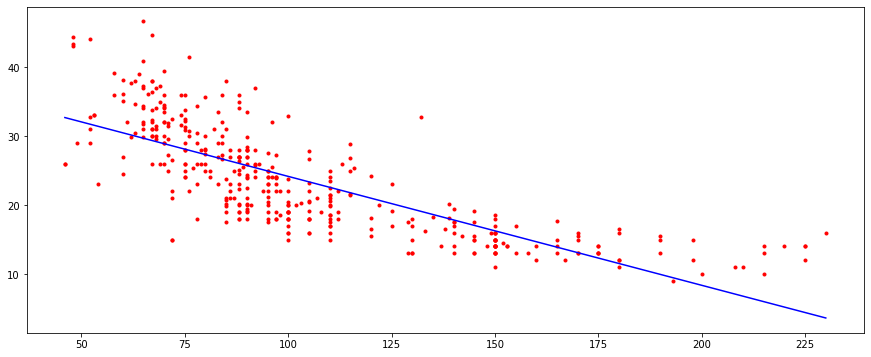

In [21]:
limits_horsepower = np.array([min(X), max(X)])
mpg_vals = regr.intercept_[0] + regr.coef_[0][0]*limits_horsepower

plt.rcParams['figure.figsize'] = [15, 6]
plt.plot(auto['horsepower'], auto['mpg'], '.r')
plt.plot(limits_horsepower, mpg_vals, 'b-')
plt.show()

## Section 2 -- Classification

**3)** Suppose that a dataset is divided into two equally-sized training and test sets, and then try out two different classification procedures:

* The first is the logistic regression, obtaining an error rate of 20% on the training data and 30% on the test data.
* The second is a 1-nearest neighbors, with an average error rate (averaged over test and training datasets) of 18%.

Based on these results, which method is preferred for classifying new observations? Why?

**4.a)** Load the dataset "auto.csv"

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

auto = pd.read_csv("auto.csv")
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


**4.b)** Create a new column, "mpg01", that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median.

In [ ]:
mpg01 = (auto['mpg'] < np.mean(auto['mpg'])) + 0
mpg01 = (auto['mpg'] > np.mean(auto['mpg'])) + 0
#auto.insert(1, 'mpg01', mpg01.values)
auto

,mpg,mpg01,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...,...
387,27.0,1,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,1,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,1,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,1,4,120.0,79,2625,18.6,82,1,ford ranger


**4.c)** Do a scatterplot matrix between the columns to evaluate which other features seem most likely to be useful in predicting mpg01. Consider dropping the columns origin and name as they are categorical. Describe your findings.

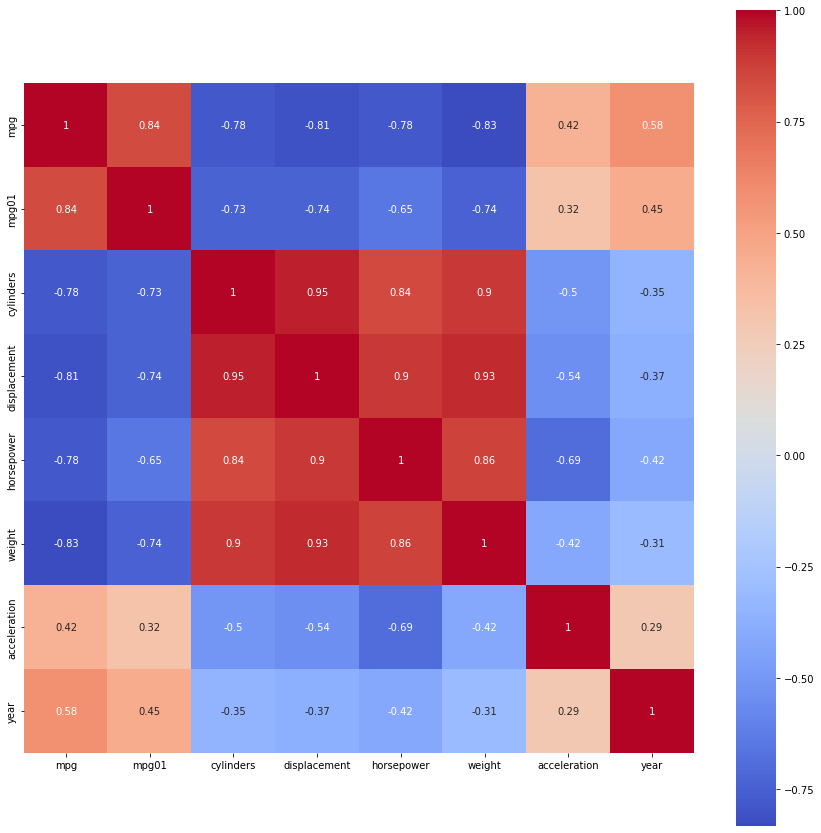

In [ ]:
## Import pearsonr function from scipy -- calculate the correlation and p-value between two columns
from scipy.stats import pearsonr

## Calculate the correlations between the columns
df = auto.drop(columns= ['name','origin'])
auto_corrs = df.corr(method='pearson')

## Calculate the p-value, as the second element of the response from the pearsonr function. 
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1])

## Plot the correlation matrix using seaborn's heatmap function
plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(auto_corrs, square = True, cmap = 'coolwarm', annot = True)

#plt.rcParams['figure.figsize'] = [15, 6]
#plt.plot(df['lstat'], df['medv'], '.r')
#plt.show()

**4.d)** Drop the "name" and the "mpg" columns (the original mpg, not the mpg01). Create two new columns named "origin1" and "origin2". The first takes the value 1 when column origin is 1, and 0 otherwise; the second takes the value 1 when the column origin is 2 and 0 otherwise. Then, drop column origin.

**4.e)** Split the data into test and training datasets. Consider a test dataset comprised of 30% of the whole dataset.

In [ ]:
from sklearn.model_selection import train_test_split
# Establish the idxs of each test and train datasets
# Ratio of test dataset
X = df.drop(columns=['mpg','mpg01'])
y = df['mpg01']
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.3 )


#idxs_test = sample(range(df.shape[0]), int(test_size * df.shape[0]))  # Sample idxs for test datasets
#idxs_train = [i for i in range(df.shape[0]) if i not in idxs_test]                 # Obtain the remaining idxs as training

     cylinders  displacement  horsepower  weight  acceleration  year
321          4         156.0         105    2800          14.4    80
195          4          90.0          70    1937          14.2    76
302          4          91.0          69    2130          14.7    79
23           4         121.0         113    2234          12.5    70
354          4         141.0          80    3230          20.4    81
..         ...           ...         ...     ...           ...   ...
249          8         302.0         139    3570          12.8    78
44           6         258.0         110    2962          13.5    71
377          4          91.0          67    1965          15.0    82
37           8         350.0         165    4209          12.0    71
253          4         140.0          88    2720          15.4    78

[274 rows x 6 columns]      cylinders  displacement  horsepower  weight  acceleration  year
296          8         350.0         125    3900          17.4    79
115       

**4.f)** Perform LDA on the training data in order to predict mpg01 using the remaining variables. What is the test error of the model obtained?

**4.g)** Perform QDA on the training data in order to predict mpg01 using the remaining variables. What is the test error of the model obtained?

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import r2_score

#Quadratic Discriminant Analysis of the training data
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
mpg01_predqda = qda.predict(X_test)
r2_value = r2_score(y_test, mpg01_predqda)
print('R^2: {:.5f}'.format(r2_value))

#Plot
#plt.rcParams['figure.figsize'] = [15, 6]
#plt.plot(X_train, y_train, 'red')
#plt.plot(X_test, y_test, 'green')
#plt.show()



R^2: 0.61609


**4.h)** Perform logistic regression on the training data in order to predict mpg01 using the remaining variables. What is the test error of the model obtained?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

lg = LogisticRegression()
lg.fit(X, y)
mpg01_lgpredic = lg.predict(X_test)
r2_lg_value = r2_score (y_test, mpg01_lgpredic)
print('R^2: {:.5f}'.format(r2_lg_value))

R^2: 0.61609


**4.i)** Perform naive Bayes on the training data in order to predict mpg01 using the remaining variables. What is the test error of the model obtained?

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
mpg01_nb_pred = gnb.fit(X_train, y_train).predict(X_test)
r2_nb_value = r2_score (y_test, mpg01_nb_pred)
print('R^2: {:.5f}'.format(r2_nb_value))

R^2: 0.58119


**4.j)** Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables "displacement", "horsepower", and "weight". What test errors are obtained? Which value of K seems to perform the best on this data set?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X, y)
mpg01_k_pred = neigh.predict(X_test)
r2_k_value = r2_score (y_test, mpg01_k_pred)
print('R^2: {:.5f}'.format(r2_k_value))

R^2: 0.86040


**4.k)** Calculate the area under curve (AUC) for the LDA, QDA, logistic regression, naive Bayes and for the best value of K for the KNN method. Compare the results.

## Section 3 -- Bootstrap and k-Fold

**5.a)** Explain how k-fold cross-validation is implemented

**5.b)** What are the advantages and disadvantages of k-Fold cross-validation relative to:

1. Validation set approach.
2. Leave One Out Cross-Validation (LOOCV)

## Section 4 -- Other Questions

**6)** In your group's option, what are the advantages and disadvantages of using a virtual environment when programming in Python?

**7)** In your group's opinion, in what circumstances is it better to use Jupyter Notebooks and when is it better to use Google Colab notebooks? Give some specific examples.

**8)** Enter your GitHub repository webpage.